# 1. Basic filtering methods
## 1.1 Variance
the variance method filters features by removing features with zero variance. these features provide us with no information

This is straightforward, no code example is given. SKlearn does have a library function

In [3]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)

#can use sel.fit() on training data

## 1.2 Quasi constant features
quasi constant features are those with very low variance. This is again straight forward. for example, set the treshold to 0.02

# 2. Univariate Methods
## 2.1 Select K best
the select k best method selects the k best scores from a statistical test. for example, if we are using the chi2 method for determining feature significiance the k best statistics would be chosen as the feature set
### Example using Iris data


In [5]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
X, y = load_iris(return_X_y=True)
print(X.shape)

#before the feature selection via chi2
clf = KNeighborsClassifier()
clf.fit(X, y)
print("The predicted accuracy: {0}".format(clf.score(X,y)))


# select the two best features
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new.shape)

#here we can also use th chi2 test to show significance
fscore, p = chi2(X, y)
print(p)

#now compare the classification rate
from sklearn.neighbors import KNeighborsClassifier
clf.fit(X_new, y)

print("The predicted accuracy: {0}".format(clf.score(X_new,y)))
#print(clf.predict_proba(X))

(150, 4)
The predicted accuracy: 0.9666666666666667
(150, 3)
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
The predicted accuracy: 0.9733333333333334


We can see that 2 features are very significant. These could maybe improve the classification methods. 

Using the 3 desired features can actually improve the accuracy of the model

## 2.2 Select Precentile
Selects features based on a percentage of the highest scores. Very similar to k best....

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2

# Mutual information.
A measure of dependence of the features. Independent variables will have no mutual informations 
Dependent variables wil share a lot of information



## Mutual information classifier

In [25]:
from sklearn.feature_selection import mutual_info_classif
clf = mutual_info_classif(X, y, random_state=101)

clf

array([0.46644605, 0.27333904, 0.97748796, 1.00047169])

The above code gives us a mutual information score. From this we can see that the most information provided about the iris flow class is given in feature 0, 2, and 3.

K select can also be used for larger datasets. lets generate a dataset and use the selectKBest scikit learn model to select the k best models.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification 
from sklearn.feature_selection import VarianceThreshold

import pandas as pd


#lets make a dataset where we can test a few methods of data scrapping from
x,y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
labels = [f"f{i+1}" for i in range(20)]

x = pd.DataFrame(x, columns=labels)

#lets apply the constant and quasi constant variance filtering method to remove
# some of the redudant features

sel = VarianceThreshold(threshold=0.01)
sel.fit(x,y)

x = sel.transform(x)
print(x.shape)



(1000, 20)


# Example 2.1 Continuous Data feature selction

THe methods we are going to use are ANOVA analysis and mutual information. First lets use the analysis of variance and then mutual information

## ANOVA
validation pipeline will be used against a standard KNN model


ANOVA Results
         f1        f2        f3        f4        f5        f6        f7  \
0 -5.091809  0.629824 -1.566375 -1.241598  0.841560 -0.886274 -0.065181   
1  1.791420  1.532285  2.155000  0.205158 -1.569024  4.305629  3.731473   
2 -7.570856 -0.292097 -3.634720 -5.367011 -0.116225 -0.341281  1.433913   
3  1.319367  0.611212 -1.014426  1.382305  3.061678 -0.329622 -0.720466   
4  0.956191  2.022438  2.471029  3.649059  1.464519  5.834790  0.418345   

         f8        f9       f10       f11       f12       f13       f14  \
0 -6.486613 -0.561925 -0.294076  2.274556  3.703470  1.656175  3.693484   
1  0.569103  0.112509 -0.853574 -2.655037 -0.164859 -2.531568 -2.309997   
2  0.314159 -5.003134 -0.328831 -0.577210 -0.904928 -3.394605 -0.948612   
3  3.193088 -0.513515 -0.856397 -1.176688 -2.615865 -1.532934  0.592187   
4 -0.814510  4.961980  0.932028  1.047358  0.661785 -1.090045 -0.834592   

        f15       f16       f17       f18       f19       f20  
0  5.260814  1.17181

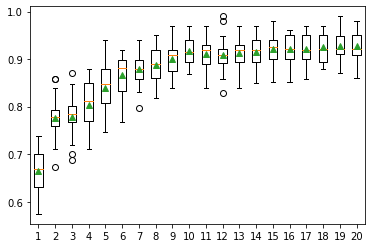

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
model = KNeighborsClassifier()

#lets first take anova of all the measurements
fscore, pvalue = f_classif(x, y)
print(f"ANOVA Results")
pvalue = pd.Series(pvalue)
labels = [f"f{i+1}" for i in range(20)]

x = pd.DataFrame(x, columns=labels)
print(x.head())
pvalue.index = x.columns
print(pvalue.sort_values(ascending=True))
results = []
num_features = [i+1 for i in range(x.shape[1])]

for k in range(x.shape[1]):
    '''fs = SelectKBest(score_func=f_classif, k=k+1)
    pipeline = Pipeline(steps=[('anova', fs), ('lr', model)])'''
    fs = SelectKBest(score_func=f_classif, k=k+1)
    pipeline = Pipeline(steps=[('anova', fs), ("knn", model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('>%d %.3f (%.3f)' % (k+1, mean(scores), std(scores)))
    results.append(scores)

import matplotlib.pyplot as plt
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()
    




### Removing redudancies

We know from our dataset that there are 5 useless features. However, from our anova analysis, we see from the box and whisker plots we still achieve highest accuracy when all the features are included. Lets see if we can filter the useless ones out

From our anova analysis in the previous case, we see f11, f2, f3, f9, f8 are all uselss. Lets try and get rid of those by filtering out redundancies


>1 0.664 (0.046)
>2 0.777 (0.040)
>3 0.779 (0.043)
>4 0.804 (0.047)
>5 0.839 (0.052)
>6 0.867 (0.040)
>7 0.879 (0.033)
>8 0.888 (0.035)
>9 0.900 (0.031)
>10 0.917 (0.029)
>11 0.910 (0.033)


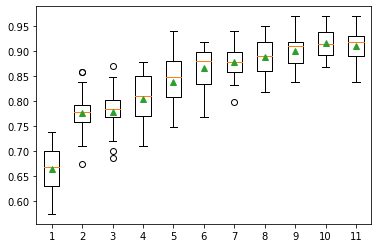

In [62]:
x = x.drop(columns=["f11", 'f3', 'f9', 'f8', 'f4', 'f1', 'f15', 'f16', 'f20'])

#now lets pass this through and anova pipeline again and evaluate the results
results = []
num_features = [i+1 for i in range(x.shape[1])]

for k in range(x.shape[1]):
    '''fs = SelectKBest(score_func=f_classif, k=k+1)
    pipeline = Pipeline(steps=[('anova', fs), ('lr', model)])'''
    fs = SelectKBest(score_func=f_classif, k=k+1)
    pipeline = Pipeline(steps=[('anova', fs), ("knn", model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print('>%d %.3f (%.3f)' % (k+1, mean(scores), std(scores)))
    results.append(scores)

plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

We see the selectKBest truely selected the best features. However what should be noted is the variance of the accuracy was the lowest at 10 features, as we have 10 features of value. The additional features are adding very little value

# Mutual Information
The same process can be done by utilizing the mutual information metric. Mutual information is a measure of entropy, comparing the uncertainty between groups. If we get a mutual information alue of 0, it means the groups are totally inependent of eachother and there is no shared information. Larger values show shared dependence

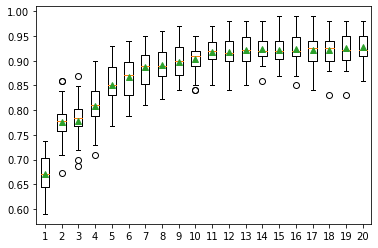

In [71]:
x,y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
labels = [f"f{i+1}" for i in range(20)]
x = pd.DataFrame(x, columns=labels)

clf = mutual_info_classif(x, y, random_state=1)
clf = pd.Series(clf)

clf.index = x.columns
#print(clf.sort_values(ascending=True))

results = []
num_features = [i+1 for i in range(x.shape[1])]

for k in range(x.shape[1]):
    fs = SelectKBest(score_func=mutual_info_classif, k=k+1)
    pipeline = Pipeline(steps=[('mutual_information', fs), ("knn", model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    #print('>%d %.3f (%.3f)' % (k+1, mean(scores), std(scores)))
    results.append(scores)

plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()